In [8]:
import pandas as pd

prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()

returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [10]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [14]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()

import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [17]:
returns.shape

(12, 2)

In [21]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum() / (number_of_obs - 1)
volatility = variance ** 0.5

volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [22]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [23]:
returns.std() * (12**0.5)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [148]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col = 0, parse_dates = True,na_values = -99.99
                     )

In [41]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [161]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [150]:
returns = returns / 100
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [167]:
returns.columns = ['SmallCap', 'LargeCap']

In [168]:
returns.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


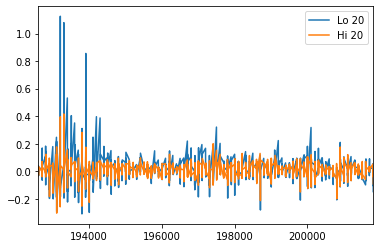

In [152]:
returns.plot()

In [153]:
returns.std()

Lo 20    0.097197
Hi 20    0.056325
dtype: float64

In [154]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [155]:
n_months=rets.shape[0]

returns_per_month = (rets+1).prod()**(1/n_months) - 1

annualized_return = (returns_per_month + 1)**12 - 1

annualized_return

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [156]:
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [157]:
annualized_return = (returns_per_month + 1)**12 - 1

annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [143]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [141]:
annualized_return / annualized_vol


SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [145]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [146]:
returns

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253
